In [1]:
import pandas as pd

df = pd.read_parquet("training_samples.parquet")
df.rename(columns={"label_name": "label"}, inplace=True)
df

,filepath,label
0,data/imagenette/2/00346.jpg,cassette player
1,data/imagenette/2/00845.jpg,cassette player
2,data/imagenette/2/00383.jpg,cassette player
3,data/imagenette/2/00503.jpg,cassette player
4,data/imagenette/2/00002.jpg,cassette player
...,...,...
95,data/imagenette/5/09030.jpg,French horn
96,data/imagenette/5/09299.jpg,French horn
97,data/imagenette/5/09018.jpg,French horn
98,data/imagenette/5/08529.jpg,French horn


In [2]:
from active_vision import ActiveLearner

al = ActiveLearner("resnet18")


2025-01-11 18:41:20.924 | INFO     | active_vision.core:load_model:30 - Loading model resnet18


In [3]:
al.load_dataset(df, "filepath", "label")

2025-01-11 18:41:20.929 | INFO     | active_vision.core:load_dataset:45 - Loading dataset from filepath and label
2025-01-11 18:41:20.930 | INFO     | active_vision.core:load_dataset:48 - Creating dataloaders
2025-01-11 18:41:21.299 | INFO     | active_vision.core:load_dataset:59 - Creating learner
2025-01-11 18:41:21.428 | INFO     | active_vision.core:load_dataset:62 - Done. Ready to train.


In [4]:
al.train_set

,filepath,label
0,data/imagenette/2/00346.jpg,cassette player
1,data/imagenette/2/00845.jpg,cassette player
2,data/imagenette/2/00383.jpg,cassette player
3,data/imagenette/2/00503.jpg,cassette player
4,data/imagenette/2/00002.jpg,cassette player
...,...,...
95,data/imagenette/5/09030.jpg,French horn
96,data/imagenette/5/09299.jpg,French horn
97,data/imagenette/5/09018.jpg,French horn
98,data/imagenette/5/08529.jpg,French horn


2025-01-11 18:41:21.441 | INFO     | active_vision.core:lr_find:65 - Finding optimal learning rate


2025-01-11 18:41:32.743 | INFO     | active_vision.core:lr_find:67 - Optimal learning rate: 0.0020892962347716093


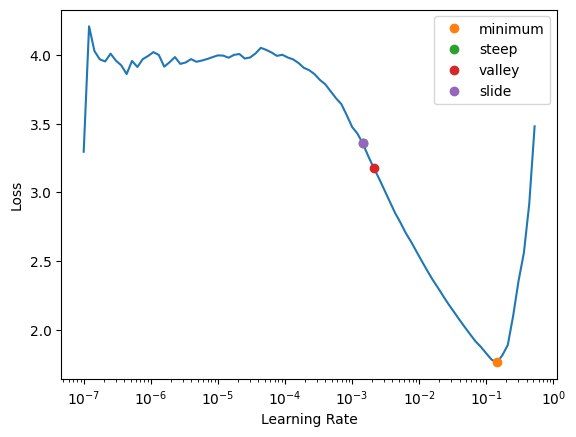

In [5]:
al.lr_find()

2025-01-11 18:41:32.996 | INFO     | active_vision.core:train:70 - Training for 3 epochs with learning rate: 0.001


epoch,train_loss,valid_loss,accuracy,time
0,3.868900,3.842949,0.150000,00:01


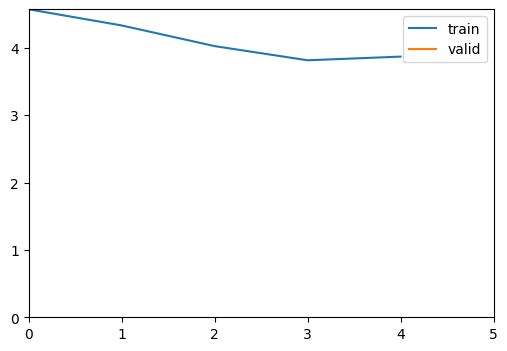

epoch,train_loss,valid_loss,accuracy,time
0,2.684922,2.779959,0.150000,00:01
1,2.122164,1.538120,0.450000,00:01
2,1.776453,1.272031,0.700000,00:01


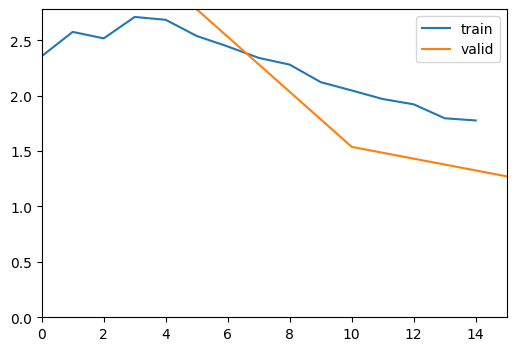

In [6]:
al.train(epochs=3, lr=1e-3)

In [7]:
## Evaluate

import pandas as pd

eval_df = pd.read_parquet("evaluation_samples.parquet")
eval_df.rename(columns={"label_name": "label"}, inplace=True)
eval_df


,filepath,label
0,data/imagenette/2/00000.jpg,cassette player
1,data/imagenette/2/00001.jpg,cassette player
2,data/imagenette/2/00002.jpg,cassette player
3,data/imagenette/2/00003.jpg,cassette player
4,data/imagenette/2/00004.jpg,cassette player
...,...,...
3920,data/imagenette/5/03920.jpg,French horn
3921,data/imagenette/5/03921.jpg,French horn
3922,data/imagenette/5/03922.jpg,French horn
3923,data/imagenette/5/03923.jpg,French horn


In [8]:
al.evaluate(eval_df, "filepath", "label")

2025-01-11 18:41:42.171 | INFO     | active_vision.core:evaluate:110 - Accuracy: 72.79%


0.7278980891719745

In [9]:
import pandas as pd

df = pd.read_parquet("evaluation_samples.parquet").drop(columns=["label_name"])
filepaths = df["filepath"].tolist()

filepaths


['data/imagenette/2/00000.jpg',
 'data/imagenette/2/00001.jpg',
 'data/imagenette/2/00002.jpg',
 'data/imagenette/2/00003.jpg',
 'data/imagenette/2/00004.jpg',
 'data/imagenette/2/00005.jpg',
 'data/imagenette/2/00006.jpg',
 'data/imagenette/2/00007.jpg',
 'data/imagenette/2/00008.jpg',
 'data/imagenette/2/00009.jpg',
 'data/imagenette/2/00010.jpg',
 'data/imagenette/2/00011.jpg',
 'data/imagenette/2/00012.jpg',
 'data/imagenette/2/00013.jpg',
 'data/imagenette/2/00014.jpg',
 'data/imagenette/2/00015.jpg',
 'data/imagenette/2/00016.jpg',
 'data/imagenette/2/00017.jpg',
 'data/imagenette/2/00018.jpg',
 'data/imagenette/2/00019.jpg',
 'data/imagenette/2/00020.jpg',
 'data/imagenette/2/00021.jpg',
 'data/imagenette/2/00022.jpg',
 'data/imagenette/2/00023.jpg',
 'data/imagenette/2/00024.jpg',
 'data/imagenette/2/00025.jpg',
 'data/imagenette/2/00026.jpg',
 'data/imagenette/2/00027.jpg',
 'data/imagenette/2/00028.jpg',
 'data/imagenette/2/00029.jpg',
 'data/imagenette/2/00030.jpg',
 'data/i

In [10]:
al.predict(filepaths, batch_size=128)

2025-01-11 18:41:42.189 | INFO     | active_vision.core:predict:77 - Running inference on 3925 samples


,filepath,pred_label,pred_conf
0,data/imagenette/2/00000.jpg,cassette player,0.204883
1,data/imagenette/2/00001.jpg,cassette player,0.159296
2,data/imagenette/2/00002.jpg,English springer,0.209846
3,data/imagenette/2/00003.jpg,cassette player,0.130170
4,data/imagenette/2/00004.jpg,English springer,0.166137
...,...,...,...
3920,data/imagenette/5/03920.jpg,French horn,0.214445
3921,data/imagenette/5/03921.jpg,tench,0.142538
3922,data/imagenette/5/03922.jpg,tench,0.134777
3923,data/imagenette/5/03923.jpg,French horn,0.183963


In [11]:
uncertain_df = al.sample_uncertain(10)
uncertain_df

,filepath,pred_label,pred_conf
319,data/imagenette/2/00319.jpg,cassette player,0.105722
591,data/imagenette/0/00591.jpg,parachute,0.106882
1850,data/imagenette/9/01850.jpg,French horn,0.107108
234,data/imagenette/2/00234.jpg,tench,0.107172
2266,data/imagenette/7/02266.jpg,church,0.107773
2331,data/imagenette/7/02331.jpg,garbage truck,0.107954
2285,data/imagenette/7/02285.jpg,garbage truck,0.107963
2294,data/imagenette/7/02294.jpg,gas pump,0.108385
161,data/imagenette/2/00161.jpg,golf ball,0.108574
1313,data/imagenette/4/01313.jpg,church,0.108915


In [12]:
al.add_to_train_set(uncertain_df)

2025-01-11 18:41:46.133 | INFO     | active_vision.core:add_to_train_set:132 - Adding 10 samples to training set
2025-01-11 18:41:46.135 | INFO     | active_vision.core:add_to_train_set:148 - All new samples added to training set
2025-01-11 18:41:46.136 | INFO     | active_vision.core:add_to_train_set:149 - Training set now has 110 samples


In [13]:
al.train_set

,filepath,label
0,data/imagenette/2/00346.jpg,cassette player
1,data/imagenette/2/00845.jpg,cassette player
2,data/imagenette/2/00383.jpg,cassette player
3,data/imagenette/2/00503.jpg,cassette player
4,data/imagenette/2/00002.jpg,cassette player
...,...,...
105,data/imagenette/7/02331.jpg,garbage truck
106,data/imagenette/7/02285.jpg,garbage truck
107,data/imagenette/7/02294.jpg,gas pump
108,data/imagenette/2/00161.jpg,golf ball
